In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

用內建的Dataset判斷乳房腫瘤屬於良性或惡性

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

Scikit-learn規定，回歸與分類都得先建立類別的案例，才能讓Scikit-learn用fit()去學習

In [ ]:
clf1 = LogisticRegression()
clf1.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

一樣！注意係數問題

In [ ]:
for f, w in zip(breast_cancer.feature_names, clf1.coef_[0]):
  print("{0:<23}: {1:6.2f}".format(f,w))

mean radius            :   0.94
mean texture           :   0.45
mean perimeter         :   0.28
mean area              :  -0.02
mean smoothness        :  -0.04
mean compactness       :  -0.17
mean concavity         :  -0.23
mean concave points    :  -0.10
mean symmetry          :  -0.05
mean fractal dimension :  -0.01
radius error           :   0.04
texture error          :   0.37
perimeter error        :   0.14
area error             :  -0.11
smoothness error       :  -0.00
compactness error      :  -0.04
concavity error        :  -0.05
concave points error   :  -0.01
symmetry error         :  -0.01
fractal dimension error:  -0.00
worst radius           :   1.00
worst texture          :  -0.50
worst perimeter        :  -0.25
worst area             :  -0.01
worst smoothness       :  -0.06
worst compactness      :  -0.51
worst concavity        :  -0.64
worst concave points   :  -0.19
worst symmetry         :  -0.15
worst fractal dimension:  -0.05


利用決策樹來管理這些規則

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

把決策樹畫出來

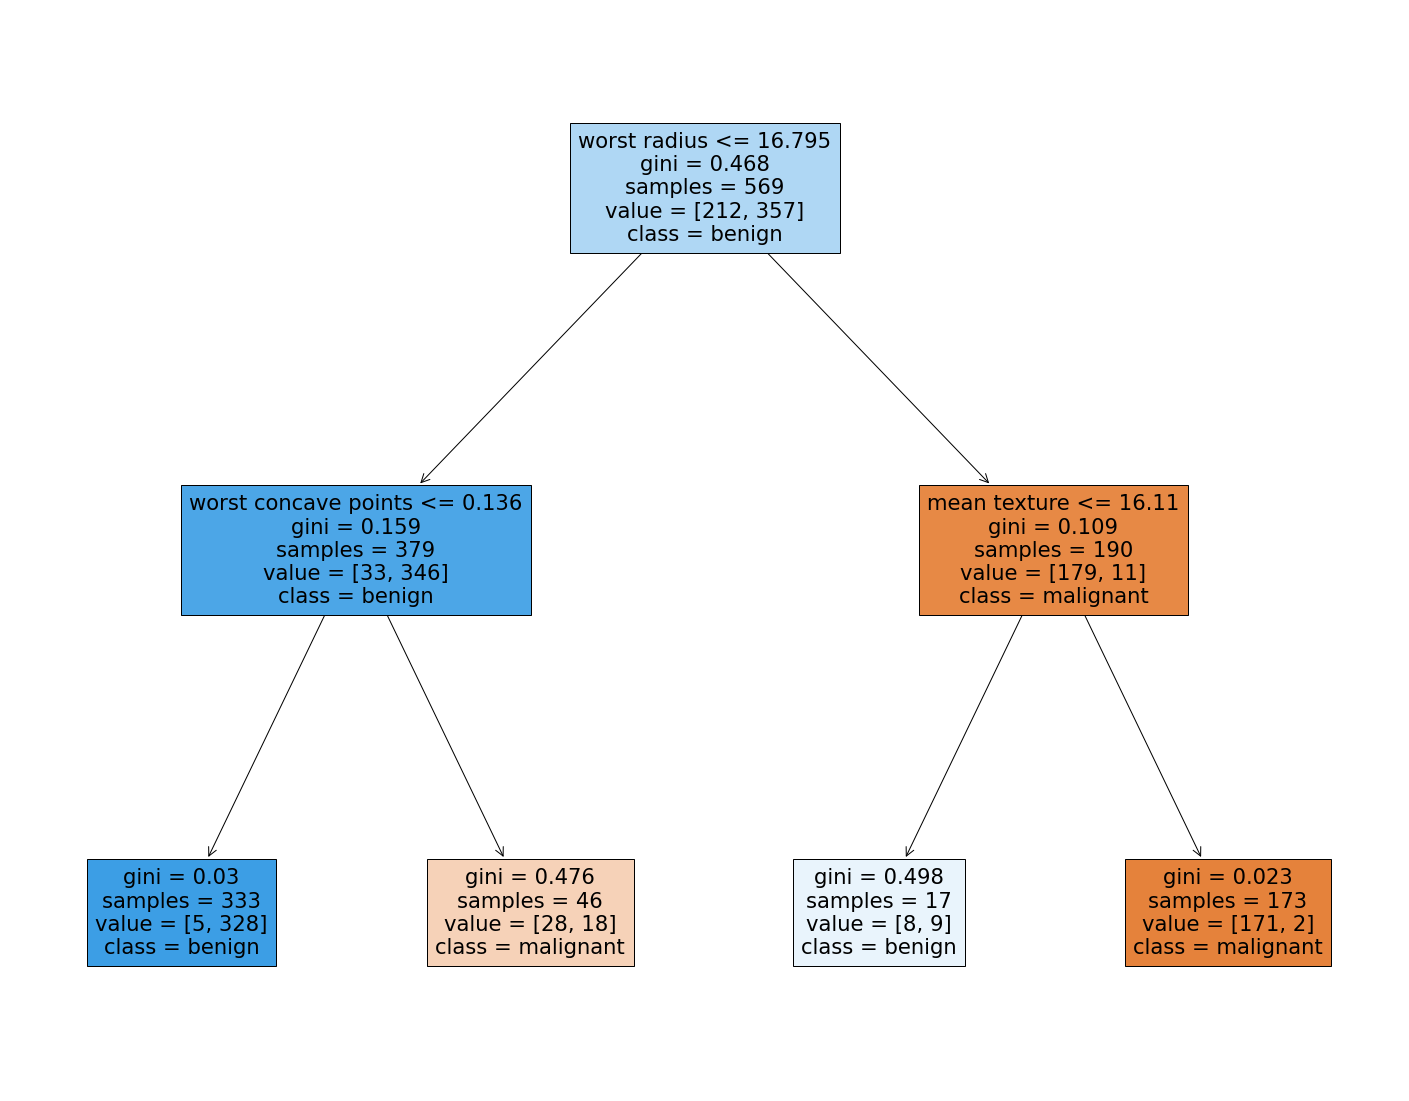

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf2, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names, filled=True)

1. 腫瘤半徑16.795, < 的看凹陷度, > 就看濃淡值的標準差 (內部節點)
2. 腫瘤半徑<16.795的, 凹陷度<0.136, 良性
3. 腫瘤半徑<16.795的, 凹陷度>0.136, 惡性
4. 腫瘤半徑>16.795的, 濃淡值的標準差<16.11, 良性
5. 腫瘤半徑>16.795的, 濃淡值的標準差>16.11, 惡性

所以這個決策樹是不是管理了四個判斷式？